# Increasing Signal-to-Noise Ratio of EEG Data

2023.11.14 Ruby Lee, Mia Kim


---

## step 0: set up
1. download the python packages
     
     (remember to run the code using the same version of python you downloaded the packages too!!)

     ``` pip install mne```

     ``` pip install numpy```


     ``` pip install matplotlib```



2. change the csv folder path to your own and pick a file in that folder to test 

In [1]:
#set up the variables
directory = "/Users/rubylee/SmartMusic-1/Ichi"
testingFile = "1698979544.csv"

---

## step 1: visualizing the original eeg data in the csv files

Here, we are reading the brain waves data from the csv files and visualizing it using Matplot


- Structure of the csv files

    - rows: each row has the brainwaves data of the current time (currently just using 1~10 seconds)
 
    - cols: there are 4 types of brain waves and 4 channels, so there are 16 columns

#### drawing the voltage to time graph
click run to see the results of the raw data in one of the files

current filepath: /Users/rubylee/SmartMusic-1/Ichi/1698979544.csv


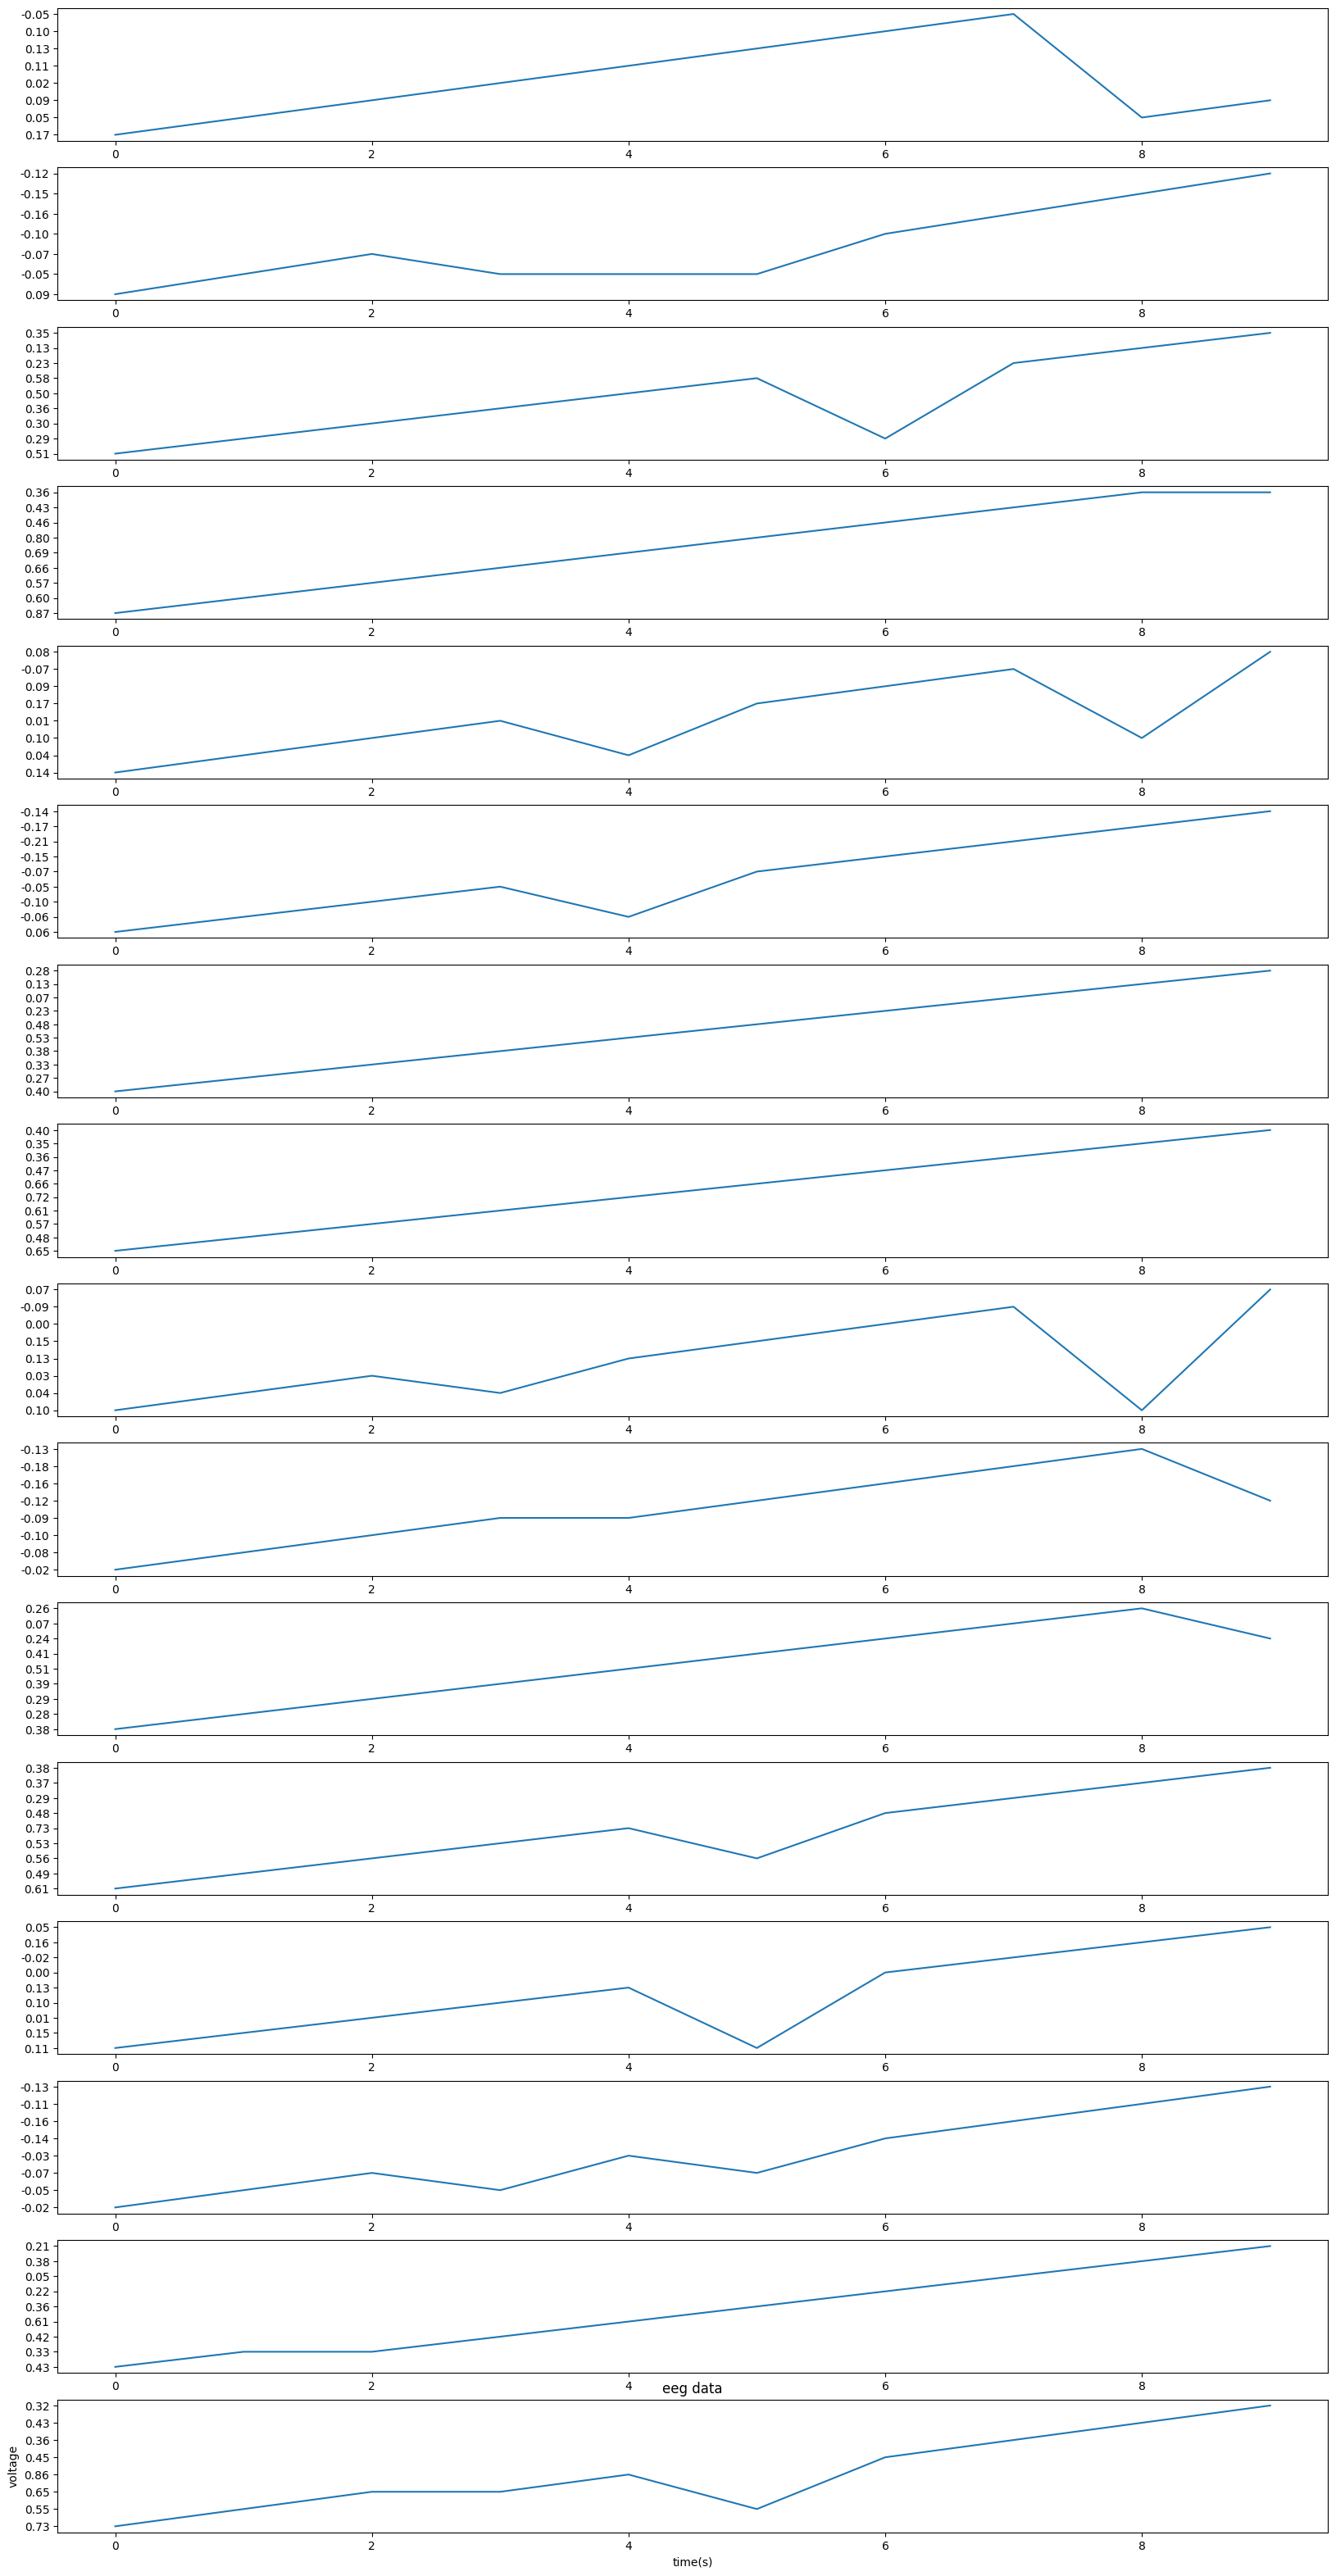

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pylab
import csv

# this function is to convert the csv to a timestamp array and a list containing 16 arrays
def csv_to_array(csv_reader):
    line_count = 0
    brainwaves= [[]]*16
    timepoints= [] * 10

    for row in csv_reader:
            timepoints.append(line_count) 
            for x in range(16):
                brainwave = brainwaves[x].copy()
                brainwave.append(sci2int(row[x]))
                brainwaves[x]=brainwave
            line_count += 1
    return brainwaves, timepoints

# this function is to draw the graph with 16 lines representing different channel/brain-waves combinations
def plot_graph(brainwavesData, timestamps):
    # print(timestamps)
    fig, ax = plt.subplots(16,1,figsize=(20,40))
    for x in range(16):
        # print(brainwavesData[x])
        ax[x].plot(timestamps, brainwavesData[x], label="waves "+str(x+1))

    # plt.legend()
    plt.xlabel('time(s)')
    plt.ylabel('voltage')
    plt.title('eeg data')
    plt.show()

def sci2int(sci):
    number_as_float = float(sci)
    return "{:.2f}".format(number_as_float)        
     
#main: iterate through the csv file folder and drawing seperate graphs for each file
for filename in os.listdir(directory):

    f = os.path.join(directory, filename)
    if filename=="name2score.csv": #skip the name2score file
        continue

    # checking if it is a file
    if os.path.isfile(f):
        if filename==testingFile: #just 1 file for testing for now
            print("current filepath: "+f)
            with open(f) as csv_file:
                csv_reader = csv.reader(csv_file, delimiter=',')
                brainwavesData, timepoints = csv_to_array(csv_reader) 
                plot_graph(brainwavesData, timepoints) 

#### drawing the frequency to time graph

To convert the data from microvolts to frequency, we will be using discrete fourier transform the command ```numpy.fft.fft(SIGNAL)```

> The almost invariably used algorithm to compute the Fourier transform (and arguably the most important signal processing algorithm) is the Fast Fourier Transform (FFT), which returns, for each frequency bin, a complex number from which one can then easily extract the amplitude and phase of the signal at that specific frequency. In spectral analysis, it is then common to take the magnitude-squared of the FFT to obtain an estimate of the power spectral density (or power spectrum, or periodogram), expressed in (micro)-Volts2 per Hertz in the case of EEG data.   https://raphaelvallat.com/bandpower.html

current filepath: /Users/rubylee/SmartMusic-1/Ichi/1698979544.csv


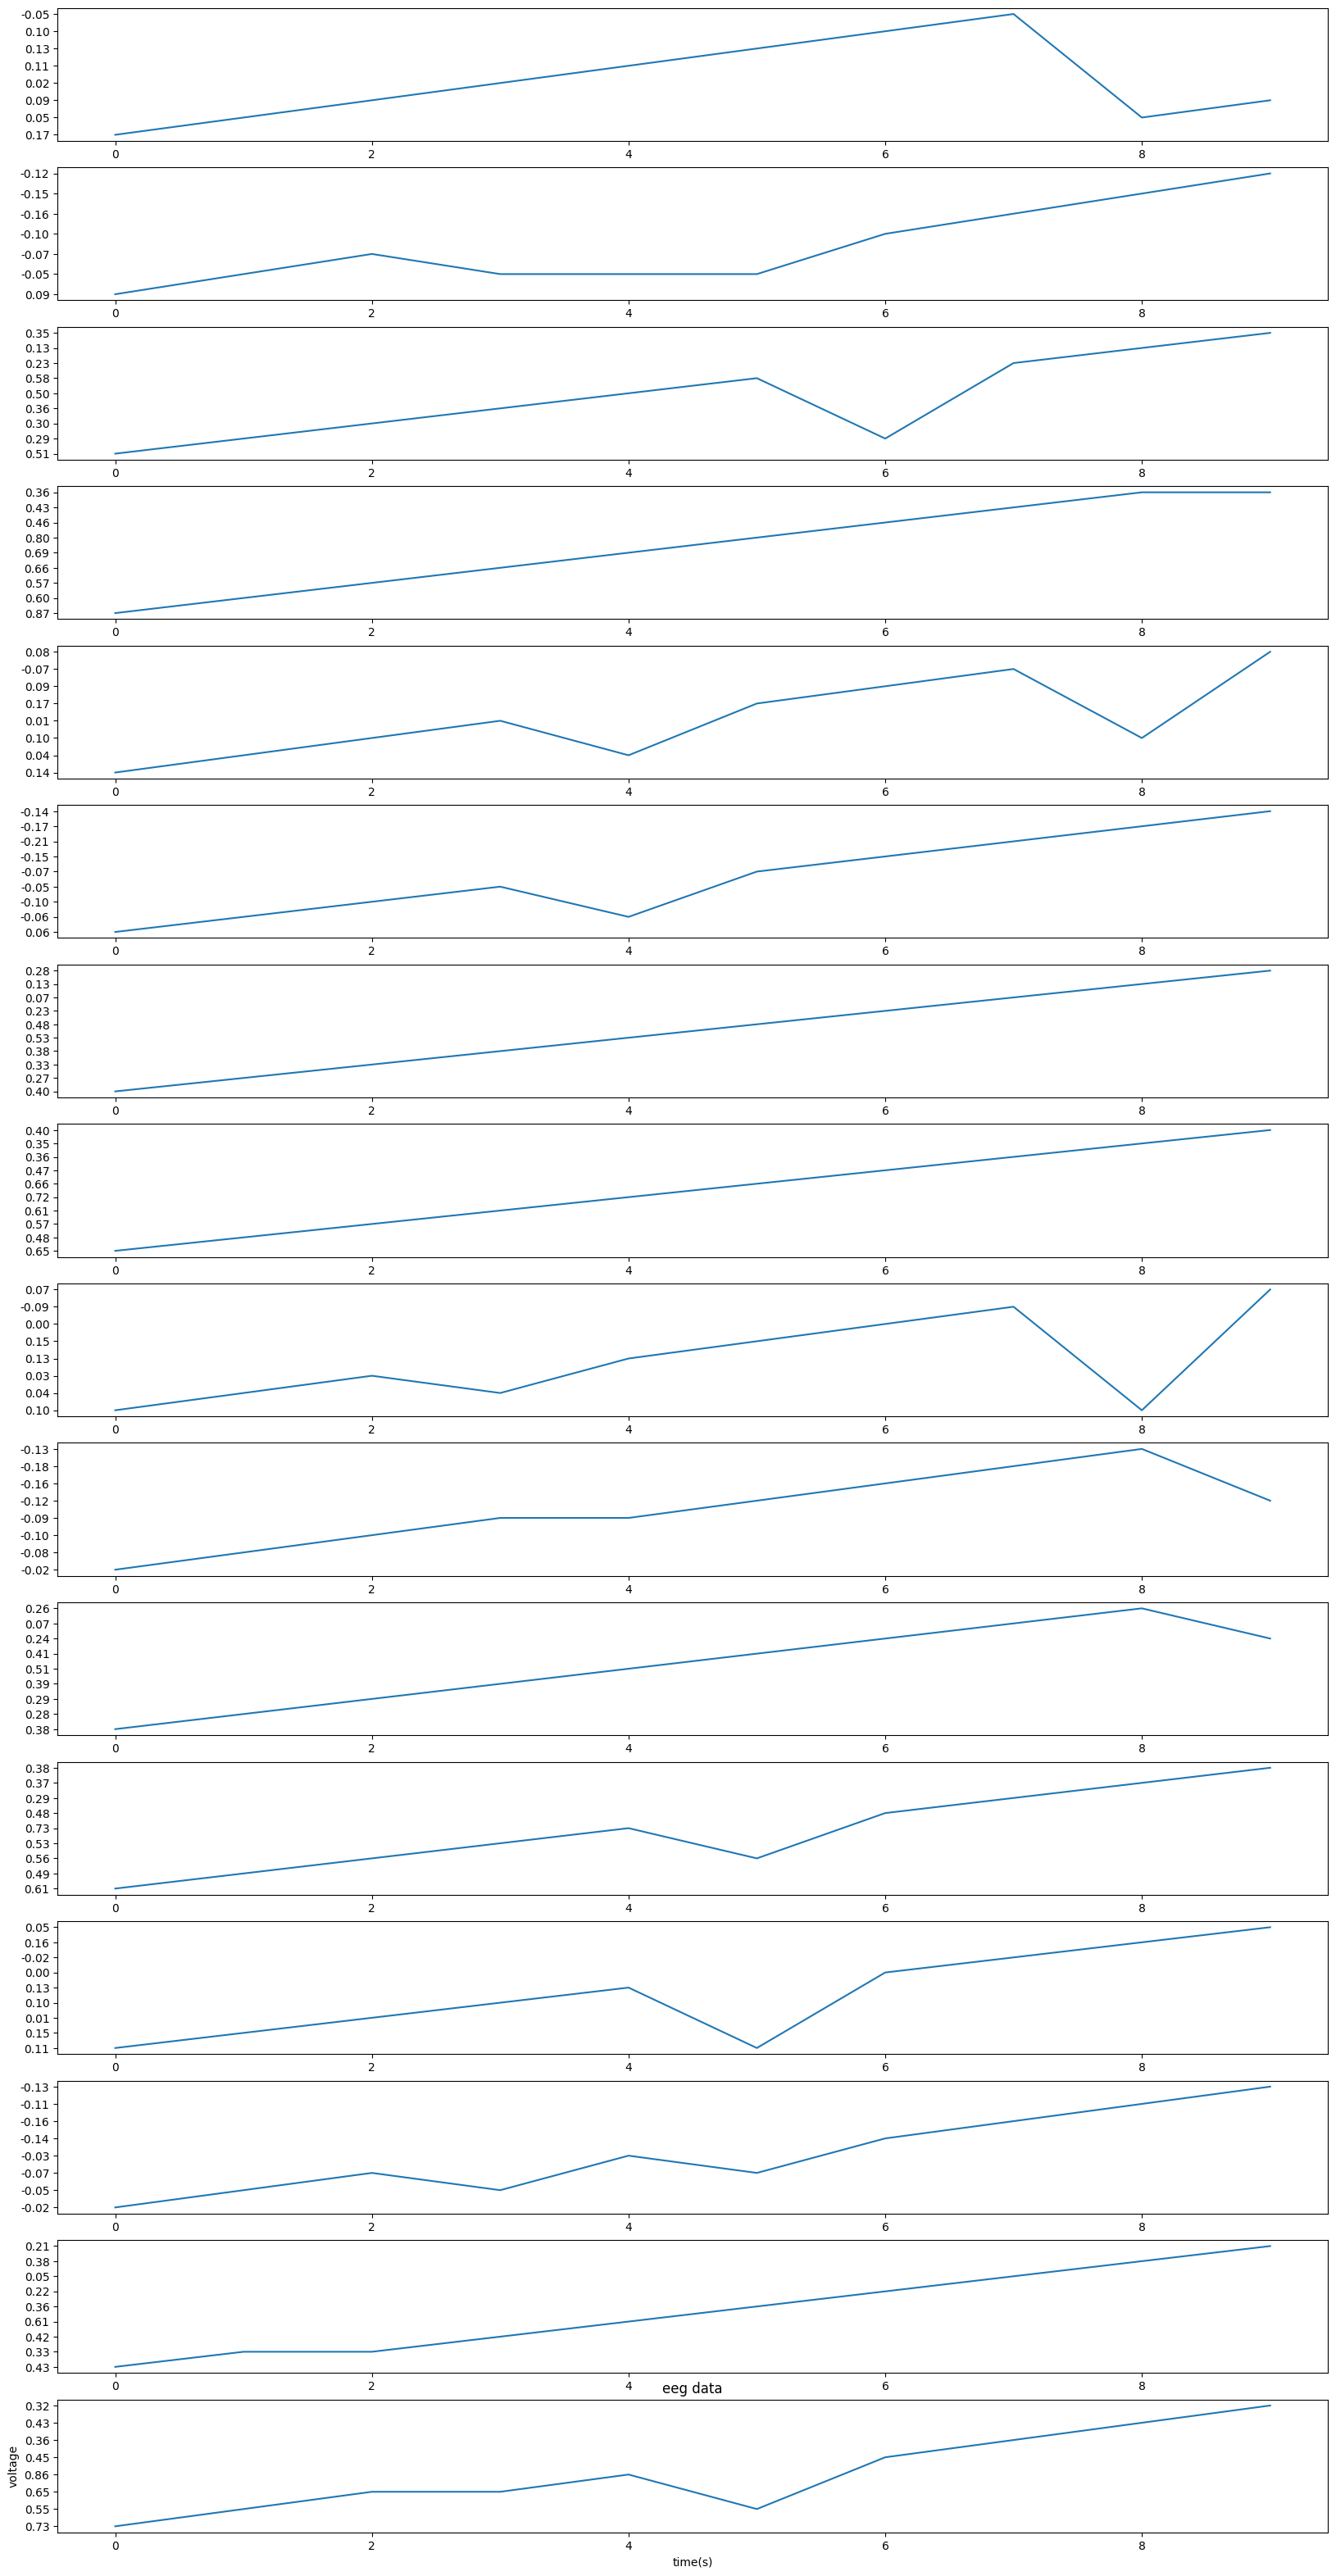

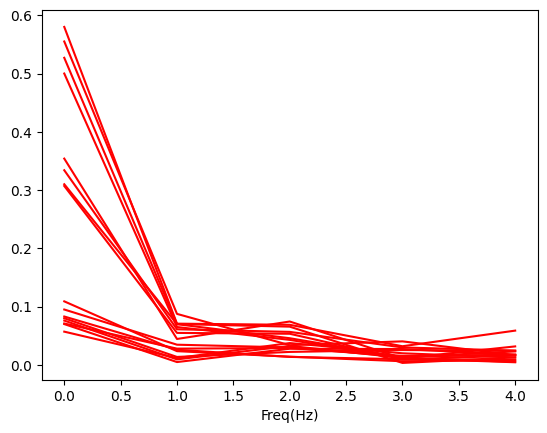

In [9]:
#length of the signal
import numpy as np
import os
import matplotlib.pyplot as plt
import pylab
import csv

directory = "/Users/rubylee/SmartMusic-1/Ichi"
testingFile = "1698979544.csv"

# this function is to convert the csv to a timestamp array and a list containing 16 arrays
def csv_to_array(csv_reader):
    line_count = 0
    brainwaves= [[]]*16
    timepoints= [] * 10

    for row in csv_reader:
            timepoints.append(line_count) 
            for x in range(16):
                brainwave = brainwaves[x].copy()
                brainwave.append(sci2int(row[x]))
                brainwaves[x]=brainwave
            line_count += 1
    return brainwaves, timepoints

# this function is to draw the graph with 16 lines representing different channel/brain-waves combinations
def plot_graph(brainwavesData, timestamps):
    # print(timestamps)
    fig, ax = plt.subplots(16,1,figsize=(20,40))
    for x in range(16):
        # print(brainwavesData[x])
        ax[x].plot(timestamps, brainwavesData[x], label="waves "+str(x+1))

    # plt.legend()
    plt.xlabel('time(s)')
    plt.ylabel('voltage')
    plt.title('eeg data')
    plt.show()

def sci2int(sci):
    number_as_float = float(sci)
    return "{:.2f}".format(number_as_float)    

#this function is to converting the graph from using time domain to frequency domain
def volts2freq(brainwavesData):   
    blockSize = 10 #length of the signal
    timeInterval = 1
    samplingRate = 1/timeInterval
    frameSize = blockSize * timeInterval

    freqdata = [[]]*16

    for x in range(16):
        brainwave = brainwavesData[x]
        freq = np.arange(blockSize)/samplingRate
        freq = freq[range(int(blockSize/2))]
        #SL: spectral line
        SL = blockSize/2
        freqResol = freq/SL

        data = brainwave
        Y = np.fft.fft(data)/blockSize
        Y = Y[range(int(blockSize/2))]

        freqdata[x] = Y
        plt.plot(freq,abs(Y),'r')
        plt.xlabel("Freq(Hz)")
        plt.show

    return freqdata

#main: iterate through the csv file folder and drawing seperate graphs for each file
for filename in os.listdir(directory):

    f = os.path.join(directory, filename)
    if filename=="name2score.csv": #skip the name2score file
        continue

    # checking if it is a file
    if os.path.isfile(f):
        if filename==testingFile: #just 1 file for testing for now
            print("current filepath: "+f)
            with open(f) as csv_file:

                #plotting the raw data
                csv_reader = csv.reader(csv_file, delimiter=',')
                brainwavesData, timepoints = csv_to_array(csv_reader) 
                plot_graph(brainwavesData, timepoints) 

                #filtering
                freqdata = volts2freq(brainwavesData)


### seperating the brain waves
> One of the most widely used method to analyze EEG data is to decompose the signal into functionally distinct frequency bands, such as delta (0.5–4 Hz), theta (4–8 Hz), alpha (8–12 Hz), beta (12–30 Hz), and gamma (30–100 Hz).

---
## Step 2: Filtering the Data

current filepath: /Users/rubylee/SmartMusic-1/Ichi/1698979544.csv


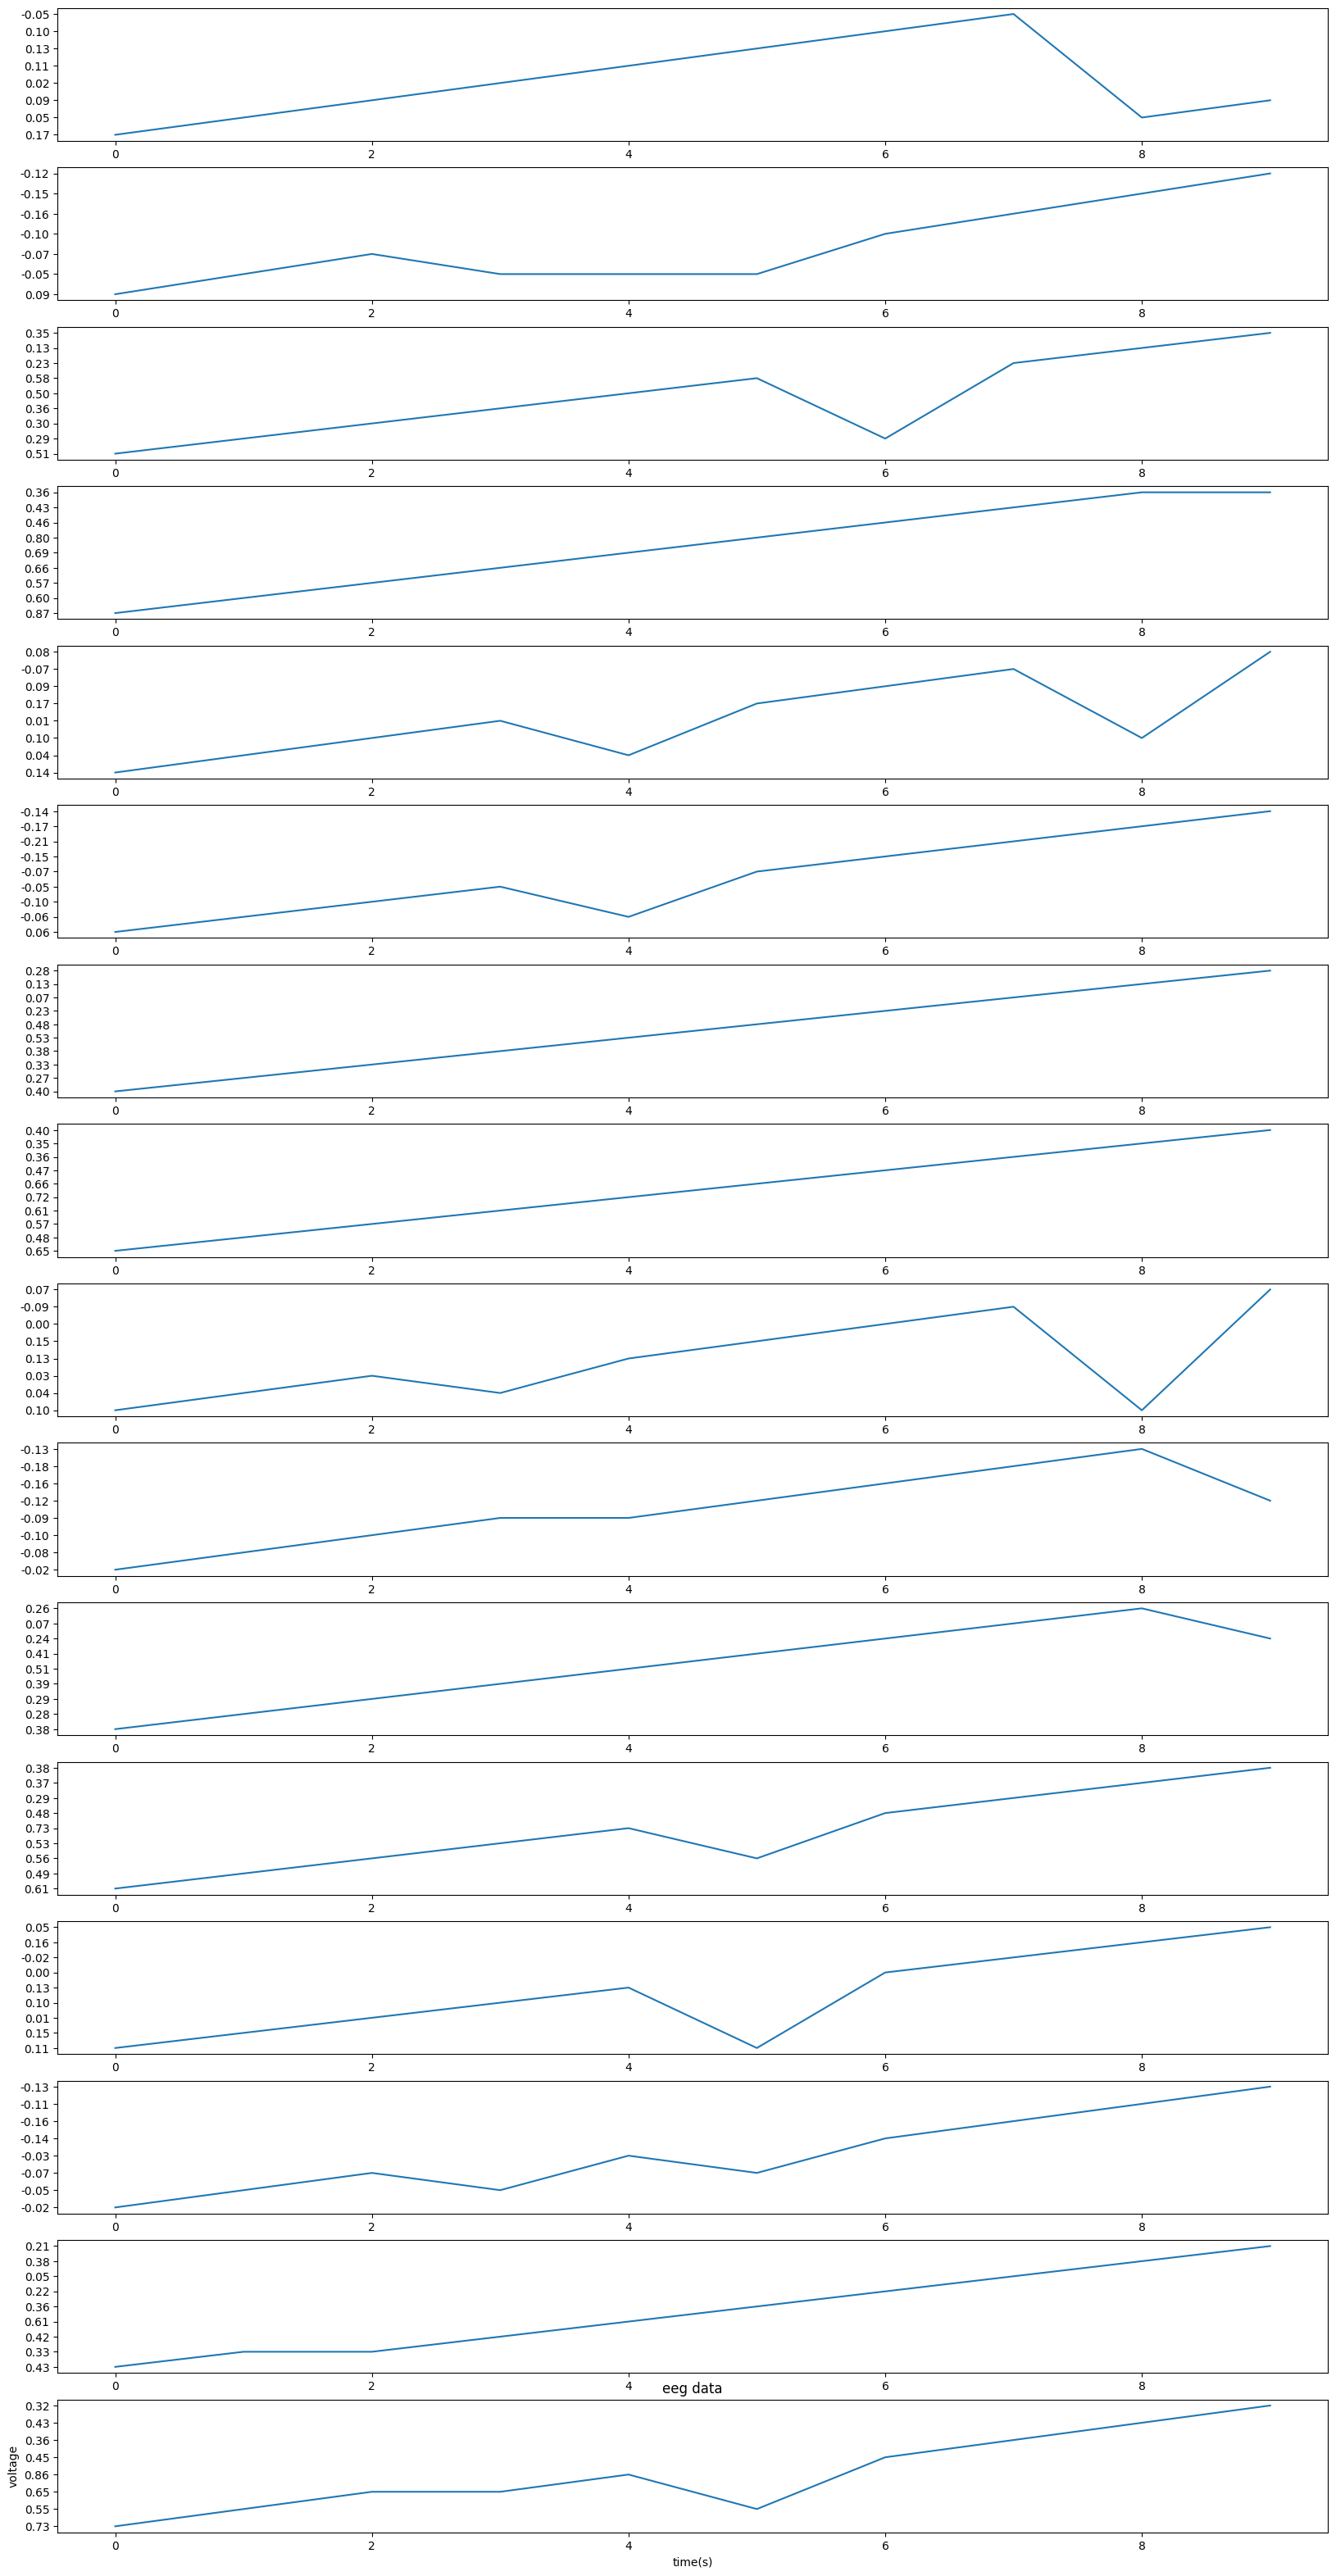

ValueError: Digital filter critical frequencies must be 0 < Wn < 1

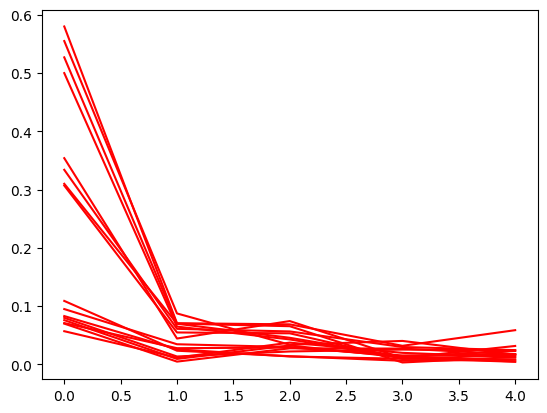

In [12]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pylab
import csv
from scipy.signal import butter, sosfilt

g_directory = "/Users/rubylee/SmartMusic-1/Ichi"
g_testingFile = "1698979544.csv"
g_lowcut = 0.5 #hz
g_highcut = 70 #hz
g_order = 5

# csv_to_array: convert the csv to a timestamp array and a list containing 16 arrays
def csv_to_array(csv_reader):
    line_count = 0
    brainwaves= [[]]*16
    timepoints= [] * 10

    for row in csv_reader:
            timepoints.append(line_count) 
            for x in range(16):
                brainwave = brainwaves[x].copy()
                brainwave.append(sci_to_int(row[x]))
                brainwaves[x]=brainwave
            line_count += 1
    return brainwaves, timepoints

# plot_graph: draw the graph with 16 lines representing different channel/brain-waves combinations
def plot_graph(brainwavesData, timestamps):
    fig, ax = plt.subplots(16,1,figsize=(20,40))
    for x in range(16):
        # print(brainwavesData[x])
        ax[x].plot(timestamps, brainwavesData[x], label="waves "+str(x+1))

    plt.xlabel('time(s)')
    plt.ylabel('voltage')
    plt.title('eeg data')
    plt.show()

# sci_to_int: convert scientific notation string to int
def sci_to_int(sci):
    number_as_float = float(sci)
    return "{:.2f}".format(number_as_float)    

# volts_to_freq: covert the graph from time domain to frequency domain using discrete 
#             fourier transform the command numpy.fft.fft(SIGNAL)
def volts_to_freq(brainwavesData):   
    blockSize = 10 #length of the signal
    timeInterval = 1
    samplingRate = 1/timeInterval
    frameSize = blockSize * timeInterval

    freqdata = [[]]*16
    index = 0

    for i in range(16):
        brainwave = brainwavesData[i]
        freq = np.arange(blockSize)/samplingRate
        freq = freq[range(int(blockSize/2))]
        #SL: spectral line
        SL = blockSize/2
        freqResol = freq/SL

        data = brainwave
        Y = np.fft.fft(data)/blockSize
        Y = Y[range(int(blockSize/2))]

        freqdata[index] = Y
        plt.plot(freq,abs(Y),'r')
        plt.show

    return freqdata

#filtering: using butterworth to filter out the noises in the raw data
def filtering(freqdata):
    filteredData = [[]]*16

    for i in range (16):
        freq = freqdata[i]
        nyquistFreq = (1/10)/5 #half the sampling rate
        low = g_lowcut / nyquistFreq
        high = g_highcut / nyquistFreq
        sos = butter(g_order, [low,high], btype = "bandpass", output='sos')
        filtered = sosfilt(sos, freq)
        filteredData[i] = filtered
    return filteredData


def plot_filtered_data(filteredData):
    blockSize = 10
    for i in range(16):
        filtered = filteredData[i]
        Y = np.fft.fft(filtered)/blockSize
        Y = Y[range(int(blockSize/2))]
        plt.plot(filtered, abs(Y),'r')

# - - - - - - - - - - - - - - - - - main - - - - - - - - - - - - - - - - - - - - 
# iterate through the csv file folder and drawing seperate graphs for each file
for filename in os.listdir(g_directory):

    f = os.path.join(g_directory, filename)
    if filename=="name2score.csv": #skip the name2score file
        continue

    # checking if it is a file
    if os.path.isfile(f):
        if filename==g_testingFile: #just 1 file for testing for now
            print("current filepath: "+f)
            with open(f) as csv_file:

                #plotting the raw data
                csv_reader = csv.reader(csv_file, delimiter=',')
                brainwavesData, timepoints = csv_to_array(csv_reader) 
                plot_graph(brainwavesData, timepoints) 

                #filtering
                freqdata = volts_to_freq(brainwavesData)
                filtereddata = filtering(freqdata)


